# 1. Perkenalan

- Nama Group : RepiuBoss
- Batch : 015
- Dataset : Review Tokopedia (https://www.kaggle.com/datasets/farhan999/tokopedia-product-reviews)
- Objectives : Collecting product or services comment reviews, clustering the isues from reviews, and sorting the data into easy readable summary.

# 2. Import Libraries

In [ ]:
! pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.1 MB/s 


In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import gensim

# Exploratory Dataset

import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Text Preprocessing

import re
import string
from nltk.tokenize import word_tokenize
# import nltk.stem as stemmer
from nltk.stem.porter import *
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory as stemmer

# Metrics and Validation

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Embedding Layer

from urllib import request
from PIL import Image

In [ ]:
# Download Stopwords and Punkt

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# 3. Data Loading

In [ ]:
# Load Dataset

data = pd.read_csv('product_reviews_dirty.csv')
data

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
0,1,Barang sesuai pesanan dan cepat sampai,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1,1740837,https://www.tokopedia.com/shakaonline87/staple...
1,2,Barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...
2,3,Paket rapi...mantap....cepat....sampe ke tujuan,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...
3,4,ya saya puas dgn barangnya,5,pertukangan,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,102279869,5,771395,https://www.tokopedia.com/kamarmesin/alat-stap...
4,5,Responya luar biasa b mantap,5,pertukangan,Isi Refill Staples Jok Kulit Motor / Staple Gu...,190679689,787,969999,https://www.tokopedia.com/mitrapersada/isi-ref...
...,...,...,...,...,...,...,...,...,...
40602,40889,gak bisa ditutup.. ukuran gak pas..,1,olahraga,MINERAL WATER POT WATER PURIFIER 28 liter BIO ...,144442054,2,648559,https://www.tokopedia.com/pusatdermawand/miner...
40603,40890,Penjual krg peduli dan brg jelek. Brg yg dikir...,1,olahraga,PANCI PRESTO IDEALIFE 7 LITER - IL 707 &#40; I...,313781913,1,648559,https://www.tokopedia.com/pusatdermawand/panci...
40604,40891,"pelayanan kurang sigap, berhari2 dr nanya baik...",1,olahraga,EXCIDER BIKE 2 - sepeda fitnes magnetic lipat ...,71873370,1,648559,https://www.tokopedia.com/pusatdermawand/excid...
40605,40892,"barang yg dikirim tsk sesuai wrn, kl memang dr...",1,olahraga,TOTAL FITNES ALAT FITNESS SIT UP BENCH TOTAL &...,201690705,2,648559,https://www.tokopedia.com/pusatdermawand/total...


In [ ]:
kamus_2 = pd.read_csv('kamus_2.txt', sep="	", header=None,names=['slang', 'fix'])

In [ ]:
kamus_2.tail()

,slang,fix
1314,istaa,nista
1315,benarjujur,benar
1316,benarjujur,jujur
1317,sayan,sayang
1318,mgkin,mungkin


In [ ]:
kamus_2.drop(index=147, inplace=True)


In [ ]:
kamus = kamus_2.append({'slang':'brg', 'fix':'barang'}, ignore_index=True)
kamus = kamus.append({'slang':'nggk', 'fix':'tidak'}, ignore_index=True)
kamus = kamus.append({'slang':'thankss', 'fix':'terima kasih'}, ignore_index=True)

In [ ]:
kamus

,slang,fix
0,7an,tujuan
1,@,di
2,ababil,abg labil
3,abis,habis
4,acc,accord
...,...,...
1316,sayan,sayang
1317,mgkin,mungkin
1318,brg,barang
1319,nggk,tidak


In [ ]:
slang_list = kamus['slang'].tolist()
fix_list = kamus['fix'].tolist()

In [ ]:
kamus.tail()

,slang,fix
1316,sayan,sayang
1317,mgkin,mungkin
1318,brg,barang
1319,nggk,tidak
1320,thankss,terima kasih


In [ ]:
data = data[data['category'].str.contains('handphone')]
data

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
3635,3659,"respons cepat, pelayanan oke. smoga langganan....",5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
3636,3660,Cakep dah... Lumayan dingin,5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
3637,3661,Nggk tau ori apa nggk yg penting berfungsi dan...,5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
3638,3662,mantap betul topp sesuai deskripsi dan gampang...,5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
3639,3663,Barang blom di buka. Mudah mudahan bagus dan t...,5,handphone,OPPO F11 Smartphone 4GB/128GB - &#40;Garansi R...,484230658,9,1988271,https://www.tokopedia.com/planet-cell/oppo-f11...
...,...,...,...,...,...,...,...,...,...
10359,10435,brg sudah sampai thankss ......,4,handphone,Battery | Blackberry Battery Charger Bundle ...,1888064,2,105244,https://www.tokopedia.com/janbun/battery-black...
10360,10436,Nah kan jadi bisa kasih review.. Respon cepat....,5,handphone,Battery Charger | Blackberry Desktop Battery J...,3683652,3,105244,https://www.tokopedia.com/janbun/battery-charg...
10361,10437,"Mantab gan, langsung ane pake..maknyus",5,handphone,Battery Charger | Blackberry Desktop Battery J...,3683652,3,105244,https://www.tokopedia.com/janbun/battery-charg...
10362,10438,Tq gan :D\nTq gan :D\nTq gan :D\nTq gan :D\nTq...,5,handphone,BLACKBERRY EBC or Desktop Battery ASY-34812-00...,1592980,1,105244,https://www.tokopedia.com/janbun/blackberry-eb...


In [ ]:
# Reset Index

data.reset_index(drop=True, inplace=True)
data

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
0,3659,"respons cepat, pelayanan oke. smoga langganan....",5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
1,3660,Cakep dah... Lumayan dingin,5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
2,3661,Nggk tau ori apa nggk yg penting berfungsi dan...,5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
3,3662,mantap betul topp sesuai deskripsi dan gampang...,5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
4,3663,Barang blom di buka. Mudah mudahan bagus dan t...,5,handphone,OPPO F11 Smartphone 4GB/128GB - &#40;Garansi R...,484230658,9,1988271,https://www.tokopedia.com/planet-cell/oppo-f11...
...,...,...,...,...,...,...,...,...,...
6131,10435,brg sudah sampai thankss ......,4,handphone,Battery | Blackberry Battery Charger Bundle ...,1888064,2,105244,https://www.tokopedia.com/janbun/battery-black...
6132,10436,Nah kan jadi bisa kasih review.. Respon cepat....,5,handphone,Battery Charger | Blackberry Desktop Battery J...,3683652,3,105244,https://www.tokopedia.com/janbun/battery-charg...
6133,10437,"Mantab gan, langsung ane pake..maknyus",5,handphone,Battery Charger | Blackberry Desktop Battery J...,3683652,3,105244,https://www.tokopedia.com/janbun/battery-charg...
6134,10438,Tq gan :D\nTq gan :D\nTq gan :D\nTq gan :D\nTq...,5,handphone,BLACKBERRY EBC or Desktop Battery ASY-34812-00...,1592980,1,105244,https://www.tokopedia.com/janbun/blackberry-eb...


In [ ]:
data.head()

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
0,3659,"respons cepat, pelayanan oke. smoga langganan....",5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
1,3660,Cakep dah... Lumayan dingin,5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
2,3661,Nggk tau ori apa nggk yg penting berfungsi dan...,5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
3,3662,mantap betul topp sesuai deskripsi dan gampang...,5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
4,3663,Barang blom di buka. Mudah mudahan bagus dan t...,5,handphone,OPPO F11 Smartphone 4GB/128GB - &#40;Garansi R...,484230658,9,1988271,https://www.tokopedia.com/planet-cell/oppo-f11...


In [ ]:
data.tail()

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
6131,10435,brg sudah sampai thankss ......,4,handphone,Battery | Blackberry Battery Charger Bundle ...,1888064,2,105244,https://www.tokopedia.com/janbun/battery-black...
6132,10436,Nah kan jadi bisa kasih review.. Respon cepat....,5,handphone,Battery Charger | Blackberry Desktop Battery J...,3683652,3,105244,https://www.tokopedia.com/janbun/battery-charg...
6133,10437,"Mantab gan, langsung ane pake..maknyus",5,handphone,Battery Charger | Blackberry Desktop Battery J...,3683652,3,105244,https://www.tokopedia.com/janbun/battery-charg...
6134,10438,Tq gan :D\nTq gan :D\nTq gan :D\nTq gan :D\nTq...,5,handphone,BLACKBERRY EBC or Desktop Battery ASY-34812-00...,1592980,1,105244,https://www.tokopedia.com/janbun/blackberry-eb...
6135,10439,barang ok...........................,5,handphone,XIAOMI Charger CYSK10 2A with USB TYPE-C Original,42034026,1,105244,https://www.tokopedia.com/janbun/xiaomi-charge...


In [ ]:
# Check Dataset - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6136 entries, 0 to 6135
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    6136 non-null   int64 
 1   text          6136 non-null   object
 2   rating        6136 non-null   int64 
 3   category      6136 non-null   object
 4   product_name  6136 non-null   object
 5   product_id    6136 non-null   int64 
 6   sold          6136 non-null   object
 7   shop_id       6136 non-null   int64 
 8   product_url   6136 non-null   object
dtypes: int64(4), object(5)
memory usage: 431.6+ KB


Data terdiri dari `6,135 rows` dan `9 columns` :

- `9 String`

In [ ]:
data.to_csv('handphone.csv')

# 4. Exploratory Data Analysis (EDA)

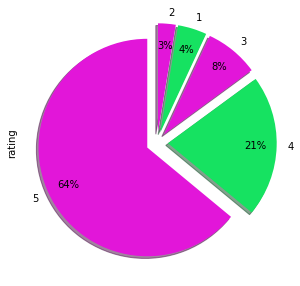

In [ ]:
# Create Pie Chart to know rating distribution

data['rating'].value_counts().plot(kind='pie', autopct='%1.0f%%',
                                  shadow=True,
                                  startangle=90,
                                  pctdistance=0.8,
                                  explode= (0.1,0.1,0.1,0.1,0.1),
                                  colors=['#e216d9', '#16e261'],
                                  figsize=(5,5))

Data terdiri dari :

- `64%` adalah bintang 5
- `21%` adalah bintang 4
- `8%` adalah bintang 3
- `4%` adalah bintang 2
- `3%` adalah bintang 1



Word Cloud for 5 Star




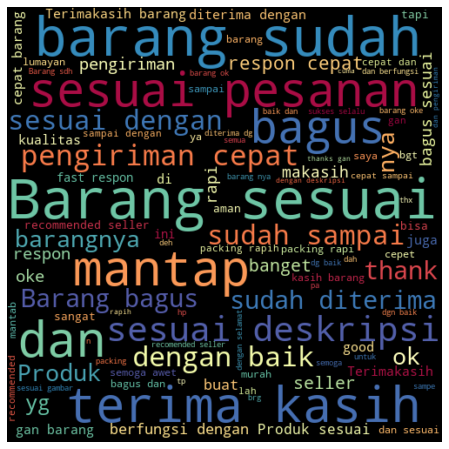

In [ ]:
# Bintang 5 WordCloud
data_5 = data.loc[data['rating']==5]

#===
Message_body_5 = " ".join(insul for insul in data_5.text)

#== 
wc5 = WordCloud(background_color='black', mode='RGB',
               width=500, max_words=100, height=500,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
               
print('\n\nWord Cloud for 5 Star\n\n')
wc5.generate(Message_body_5)
plt.figure(figsize=(16, 8))
plt.imshow(wc5, interpolation='bilinear')
plt.axis('off')
plt.show()




Word Cloud for 4 Star




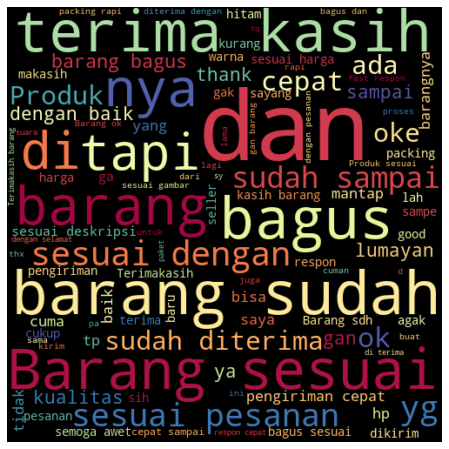

In [ ]:
# Bintang 4 WordCloud
data_4 = data.loc[data['rating']==4]

#===
Message_body_4 = " ".join(insul for insul in data_4.text)

#== 
wc4 = WordCloud(background_color='black', mode='RGB',
               width=500, max_words=100, height=500,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
               
print('\n\nWord Cloud for 4 Star\n\n')
wc4.generate(Message_body_4)
plt.figure(figsize=(16, 8))
plt.imshow(wc4, interpolation='bilinear')
plt.axis('off')
plt.show()



Word Cloud for 3 Star




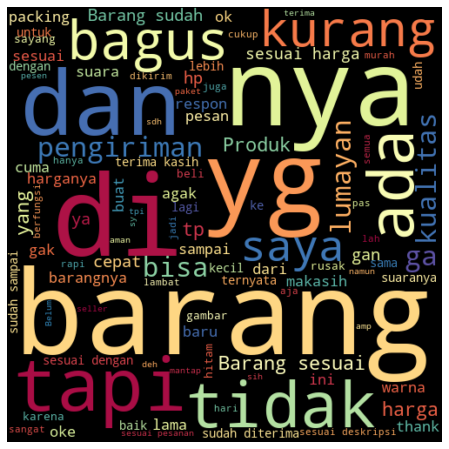

In [ ]:
# Bintang 3 WordCloud
data_3 = data.loc[data['rating']==3]

#===
Message_body_3 = " ".join(insul for insul in data_3.text)

#== 
wc3 = WordCloud(background_color='black', mode='RGB',
               width=500, max_words=100, height=500,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
               
print('\n\nWord Cloud for 3 Star\n\n')
wc3.generate(Message_body_3)
plt.figure(figsize=(16, 8))
plt.imshow(wc3, interpolation='bilinear')
plt.axis('off')
plt.show()



Word Cloud for 2 Star




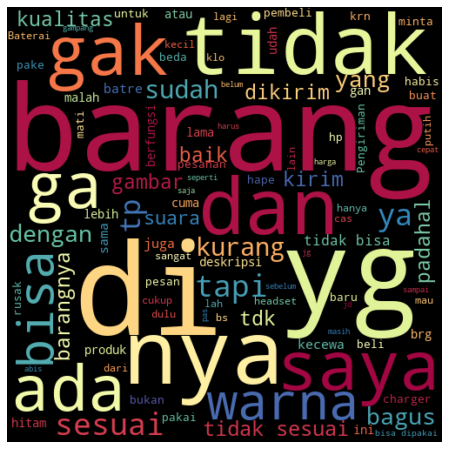

In [ ]:
# Bintang 2 WordCloud
data_2 = data.loc[data['rating']==2]

#===
Message_body_2 = " ".join(insul for insul in data_2.text)

#== 
wc2 = WordCloud(background_color='black', mode='RGB',
               width=500, max_words=100, height=500,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
               
print('\n\nWord Cloud for 2 Star\n\n')
wc2.generate(Message_body_2)
plt.figure(figsize=(16, 8))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()



Word Cloud for 1 Star




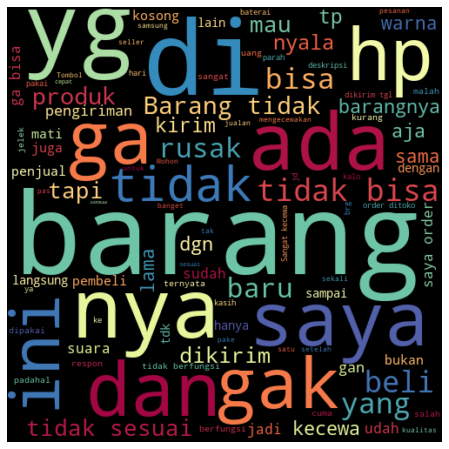

In [ ]:
# Bintang 1 WordCloud
data_1 = data.loc[data['rating']==1]

#===
Message_body_1 = " ".join(insul for insul in data_1.text)

#== 
wc1 = WordCloud(background_color='black', mode='RGB',
               width=500, max_words=100, height=500,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
               
print('\n\nWord Cloud for 1 Star\n\n')
wc1.generate(Message_body_1)
plt.figure(figsize=(16, 8))
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()

# 5. Data Preprocessing

## 5.1. Data Cleaning

In [ ]:
values = [3, 4, 5]
data = data[data.rating.isin(values) == False]

In [ ]:
data

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
12,4267,"speaker tidak jelas, jadi belum bisa dipakai",2,handphone,HP SAMSUNG Piton B310 Handphone SM-B320E Guru ...,411502661,108,4366642,https://www.tokopedia.com/fortuneid29/hp-samsu...
13,4268,"Paketannya sdh sampai, kecewa ! Pantesan aja m...",2,handphone,HP SAMSUNG Piton B310 Handphone SM-B320E Guru ...,411502661,108,4366642,https://www.tokopedia.com/fortuneid29/hp-samsu...
43,4299,"Beli 2 biji, 2-2 patah di tmpt yg sama di bagi...",1,handphone,Car phone holder 360 derajat model jepit smart...,206580458,156,442217,https://www.tokopedia.com/king-accessories/car...
75,4331,barang sesuai deskripsi tetapi tidak bs menemp...,2,handphone,Car phone holder 360 derajat model jepit smart...,206580458,156,442217,https://www.tokopedia.com/king-accessories/car...
113,4369,Saya pikir bahannya bagus.. tp ya sudahlah.. w...,2,handphone,Kaca pembesar Layar Hp/ Enlarged Screen Handphone,288580870,703,2993850,https://www.tokopedia.com/jsn25/kaca-pembesar-...
...,...,...,...,...,...,...,...,...,...
5993,10297,Barang tidak lengkap .tidak sesuwai jawaban di...,1,handphone,RJH30E2 360V 30A Transistor Mosfet IGBT TO220 ...,339057766,16,715011,https://www.tokopedia.com/hpasesoris/rjh30e2-3...
6002,10306,Photo transistor tidak sesuai dengan produk yg...,1,handphone,D2553 2SD2553 2S D2553 2553 Silicon NPN Transi...,339117996,5,715011,https://www.tokopedia.com/hpasesoris/d2553-2sd...
6098,10402,Barangnya sampai tidak sesuai pesanan,1,handphone,SAMSUNG Charger ATADM10EBE - D900 Original,1822915,1,105244,https://www.tokopedia.com/janbun/samsung-charg...
6102,10406,"alhamduliah, barang sudah diterima.\ntapi kang...",2,handphone,Charger | Blackberry HDWQ10 Original,2269322,8,105244,https://www.tokopedia.com/janbun/charger-black...


## 5.2. Get Data for Model Inference

In [ ]:
# Get Data for model Inference

data_inf = data.sample(10, random_state=25)
data_inf

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
1102,5370,Gan knp setelah d pasang kartu hp gg nyala mal...,1,handphone,NOKIA 130 dual sim handphone hp,266910555,"2,7rb",2270419,https://www.tokopedia.com/anshopp123/nokia-130...
1490,5759,Produk baru seminggu udh mati. Gimana sih,1,handphone,Samsung lipat flip Caramel GT-E1272 samsung hp...,322389014,"2,2rb",3925407,https://www.tokopedia.com/hpmurahgrosirr/samsu...
3011,7287,"Produknya ternyata kosong,tp gpp lah.. Uangnya...",1,handphone,&#40;EA033&#41; Emergency Lampu/Light Surya SQ...,262842858,89,113813,https://www.tokopedia.com/handphonetiam/ea033-...
1368,5637,ga sama dengan gambar,1,handphone,NOKIA 130 dual sim handphone hp,266910555,"2,7rb",2270419,https://www.tokopedia.com/anshopp123/nokia-130...
3402,7680,"Tidak bisa digunakan, di charge 1x langsung ga...",2,handphone,Headset Bluetooth Mini S530 - Micro Sport Ster...,55299234,"4,4rb",113813,https://www.tokopedia.com/handphonetiam/headse...
5946,10249,"Bukan barang baru, ic mati",1,handphone,ITE IT8502E IT 8502E KXA JXS JXT JXA BF51,338299875,2,715011,https://www.tokopedia.com/hpasesoris/ite-it850...
4516,8805,timbangan tidak sesuai... beda sampai 8 kg pa...,1,handphone,&#40;ED021&#41; Magic Saw Gergaji Magic Set Se...,282043088,355,113813,https://www.tokopedia.com/handphonetiam/ed021-...
3634,7914,"Pesen 2 pcs yang satunya mati total, udah masu...",1,handphone,Headset Bluetooth Mini S530 - Micro Sport Ster...,55299234,"4,4rb",113813,https://www.tokopedia.com/handphonetiam/headse...
4690,8979,Tidak bisa di pakai gan barangnya,1,handphone,&#40;IA034&#41; PUBG Fire MOBILE Button L1R1 T...,293439771,266,113813,https://www.tokopedia.com/handphonetiam/ia034-...
1056,5324,Terima kasih banyak ooo tapi barang gak ori,1,handphone,NOKIA 130 dual sim handphone hp,266910555,"2,7rb",2270419,https://www.tokopedia.com/anshopp123/nokia-130...


In [ ]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
12,4267,"speaker tidak jelas, jadi belum bisa dipakai",2,handphone,HP SAMSUNG Piton B310 Handphone SM-B320E Guru ...,411502661,108,4366642,https://www.tokopedia.com/fortuneid29/hp-samsu...
13,4268,"Paketannya sdh sampai, kecewa ! Pantesan aja m...",2,handphone,HP SAMSUNG Piton B310 Handphone SM-B320E Guru ...,411502661,108,4366642,https://www.tokopedia.com/fortuneid29/hp-samsu...
43,4299,"Beli 2 biji, 2-2 patah di tmpt yg sama di bagi...",1,handphone,Car phone holder 360 derajat model jepit smart...,206580458,156,442217,https://www.tokopedia.com/king-accessories/car...
75,4331,barang sesuai deskripsi tetapi tidak bs menemp...,2,handphone,Car phone holder 360 derajat model jepit smart...,206580458,156,442217,https://www.tokopedia.com/king-accessories/car...
113,4369,Saya pikir bahannya bagus.. tp ya sudahlah.. w...,2,handphone,Kaca pembesar Layar Hp/ Enlarged Screen Handphone,288580870,703,2993850,https://www.tokopedia.com/jsn25/kaca-pembesar-...
...,...,...,...,...,...,...,...,...,...
5993,10297,Barang tidak lengkap .tidak sesuwai jawaban di...,1,handphone,RJH30E2 360V 30A Transistor Mosfet IGBT TO220 ...,339057766,16,715011,https://www.tokopedia.com/hpasesoris/rjh30e2-3...
6002,10306,Photo transistor tidak sesuai dengan produk yg...,1,handphone,D2553 2SD2553 2S D2553 2553 Silicon NPN Transi...,339117996,5,715011,https://www.tokopedia.com/hpasesoris/d2553-2sd...
6098,10402,Barangnya sampai tidak sesuai pesanan,1,handphone,SAMSUNG Charger ATADM10EBE - D900 Original,1822915,1,105244,https://www.tokopedia.com/janbun/samsung-charg...
6102,10406,"alhamduliah, barang sudah diterima.\ntapi kang...",2,handphone,Charger | Blackberry HDWQ10 Original,2269322,8,105244,https://www.tokopedia.com/janbun/charger-black...


In [ ]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
0,5370,Gan knp setelah d pasang kartu hp gg nyala mal...,1,handphone,NOKIA 130 dual sim handphone hp,266910555,"2,7rb",2270419,https://www.tokopedia.com/anshopp123/nokia-130...
1,5759,Produk baru seminggu udh mati. Gimana sih,1,handphone,Samsung lipat flip Caramel GT-E1272 samsung hp...,322389014,"2,2rb",3925407,https://www.tokopedia.com/hpmurahgrosirr/samsu...
2,7287,"Produknya ternyata kosong,tp gpp lah.. Uangnya...",1,handphone,&#40;EA033&#41; Emergency Lampu/Light Surya SQ...,262842858,89,113813,https://www.tokopedia.com/handphonetiam/ea033-...
3,5637,ga sama dengan gambar,1,handphone,NOKIA 130 dual sim handphone hp,266910555,"2,7rb",2270419,https://www.tokopedia.com/anshopp123/nokia-130...
4,7680,"Tidak bisa digunakan, di charge 1x langsung ga...",2,handphone,Headset Bluetooth Mini S530 - Micro Sport Ster...,55299234,"4,4rb",113813,https://www.tokopedia.com/handphonetiam/headse...
5,10249,"Bukan barang baru, ic mati",1,handphone,ITE IT8502E IT 8502E KXA JXS JXT JXA BF51,338299875,2,715011,https://www.tokopedia.com/hpasesoris/ite-it850...
6,8805,timbangan tidak sesuai... beda sampai 8 kg pa...,1,handphone,&#40;ED021&#41; Magic Saw Gergaji Magic Set Se...,282043088,355,113813,https://www.tokopedia.com/handphonetiam/ed021-...
7,7914,"Pesen 2 pcs yang satunya mati total, udah masu...",1,handphone,Headset Bluetooth Mini S530 - Micro Sport Ster...,55299234,"4,4rb",113813,https://www.tokopedia.com/handphonetiam/headse...
8,8979,Tidak bisa di pakai gan barangnya,1,handphone,&#40;IA034&#41; PUBG Fire MOBILE Button L1R1 T...,293439771,266,113813,https://www.tokopedia.com/handphonetiam/ia034-...
9,5324,Terima kasih banyak ooo tapi barang gak ori,1,handphone,NOKIA 130 dual sim handphone hp,266910555,"2,7rb",2270419,https://www.tokopedia.com/anshopp123/nokia-130...


## 5.3. Text to Lowercase, Removing Punctuations, Removing Other Non Needed Texts

In [ ]:
# A Function to use in the dataframe

def text_process(text):

  # 1. Change all text to Lowercase
  text = text.lower()
  
  # 2. Removing Mentions
  text = re.sub("@[A-Za-z0-9_]+", " ", text)
  
  # 3. Removing Hashtags
  text = re.sub("#[A-Za-z0-9_]+", " ", text)
  
  # 4. Removing \n
  text = re.sub(r"\\n", " ",text)
  
  # 5. Removing Whitespaces
  text = text.strip()

  # 6. Removing Links
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # 7. Removing non text characters such as Emojis, Mathematical symbols
  text = re.sub("[^A-Za-z\s']", " ", text)

  # 8. Removing RT
  text = re.sub("rt", " ",text)

  # 9. Removing Punctuations
  text = text.translate(str.maketrans('', '', string.punctuation))

  # 11. Tokenization
  token = word_tokenize(text)

  for x in range(len(token)):
    for i in range(len(slang_list)):
      if token[x] == slang_list[i]:
        token[x] = fix_list[i]
      else:
        pass

  from nltk.util import ngrams
  _2gram = [' '.join(e) for e in ngrams(token, 2)]
  _3gram = [' '.join(e) for e in ngrams(token, 3)]
  text = token + _2gram + _3gram

  
  #text2 = ' '.join(token)

  text = np.array(text)

  
  return text

In [ ]:
# Applying Preprocessing to all Documents

data_train_test['text_processed'] = data_train_test['text'].apply(lambda x: text_process(x))

In [ ]:
Message_body = data_train_test['text']
Message_body

0           speaker tidak jelas, jadi belum bisa dipakai
1      Paketannya sdh sampai, kecewa ! Pantesan aja m...
2      Beli 2 biji, 2-2 patah di tmpt yg sama di bagi...
3      barang sesuai deskripsi tetapi tidak bs menemp...
4      Saya pikir bahannya bagus.. tp ya sudahlah.. w...
                             ...                        
410    Barang tidak lengkap .tidak sesuwai jawaban di...
411    Photo transistor tidak sesuai dengan produk yg...
412                Barangnya sampai tidak sesuai pesanan
413    alhamduliah, barang sudah diterima.\ntapi kang...
414    kayaknya enggak ori, pengisian lambat tidak se...
Name: text, Length: 415, dtype: object

In [ ]:
Message_body = data_train_test['text_processed']
Message_body

0      [speaker, tidak, jelas, jadi, belum, bisa, dip...
1      [paketannya, sudah, sampai, kecewa, pantesan, ...
2      [beli, biji, patah, di, tempat, yang, sama, di...
3      [barang, sesuai, deskripsi, tetapi, tidak, bis...
4      [saya, pikir, bahannya, bagus, tapi, iya, suda...
                             ...                        
410    [barang, tidak, lengkap, tidak, sesuwai, jawab...
411    [photo, transistor, tidak, sesuai, dengan, pro...
412    [barangnya, sampai, tidak, sesuai, pesanan, ba...
413    [alhamduliah, barang, sudah, diterima, tapi, k...
414    [kayaknya, tidak, ori, pengisian, lambat, tida...
Name: text_processed, Length: 415, dtype: object

## 5.4. Bag of Words

In [ ]:
dictionary = gensim.corpora.Dictionary(Message_body)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 15:
        break

0 belum
1 belum bisa
2 belum bisa dipakai
3 bisa
4 bisa dipakai
5 dipakai
6 jadi
7 jadi belum
8 jadi belum bisa
9 jelas
10 jelas jadi
11 jelas jadi belum
12 speaker
13 speaker tidak
14 speaker tidak jelas
15 tidak


In [ ]:
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)

## 5.5. TF-IDF

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in Message_body]

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3411118523221793), (1, 0.72371281438678), (2, 0.5999020474191581)]


# 6. Model Definition

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=12, workers=2, random_state=5)

In [ ]:
for idx, topic in lda_model.print_topics(-1, num_words=30):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.092*"sudah" + 0.085*"habis" + 0.080*"tapi" + 0.062*"cepat" + 0.046*"baterai" + 0.045*"barangnya" + 0.043*"juga" + 0.038*"jadi" + 0.037*"saya" + 0.035*"banget" + 0.025*"pakai" + 0.022*"nyala" + 0.022*"sampai" + 0.022*"bisa" + 0.020*"lama" + 0.020*"dan" + 0.019*"nya" + 0.018*"dipakai" + 0.017*"di pakai" + 0.016*"di" + 0.014*"suara" + 0.012*"padahal" + 0.012*"tidak bisa" + 0.012*"buat" + 0.011*"barang" + 0.011*"juragan" + 0.010*"iya" + 0.009*"lagi" + 0.009*"jelek" + 0.008*"cuma"
Topic: 1 
Words: 0.112*"berfungsi" + 0.081*"nya" + 0.076*"tidak berfungsi" + 0.074*"bisa" + 0.068*"tidak bisa" + 0.056*"barang" + 0.053*"nya tidak" + 0.045*"batre" + 0.039*"kurang" + 0.039*"kualitas" + 0.038*"suara" + 0.032*"hanya" + 0.029*"baik" + 0.021*"sekali" + 0.020*"padahal" + 0.017*"juga" + 0.014*"dari" + 0.013*"barang tidak" + 0.011*"langsung" + 0.011*"kalau" + 0.011*"saya" + 0.010*"nyala" + 0.010*"pakai" + 0.009*"di" + 0.009*"ke" + 0.008*"bukan" + 0.007*"sesuai" + 0.007*"produk" + 0.006

In [ ]:
def label(num):
  if num == 0:
    topic = 'Baterai cepat habis'
  elif num == 1:
    topic = 'hp tidak berfungsi, tidak sesuai, tidak nyala'
  elif num == 2:
    topic = 'barang tidak sesuai deskripsi, hp mati'
  elif num == 3:
    topic = 'positif'
  elif num == 4:
    topic = 'barang tidak sesuai pesanan'
  elif num == 5:
    topic = 'barang rusak'
  elif num == 6:
    topic = 'barang tidak sesuai, suara tidak berfungsi'
  elif num == 7:
    topic = 'warna tidak sesuai, atau barang tidak sesuai gambar'
  elif num == 8:
    topic = 'barang tidak sesuai deskripsi, pengiriman lama'
  elif num == 9:
    topic = 'barang kosong, cancel, retur'
  else:
    pass
  return topic

In [ ]:
for idx, topic in lda_model.print_topics(-1, num_words=30):
    print('Topic: {} \nWords: {}'.format(label(idx), topic))

Topic: Baterai cepat habis 
Words: 0.092*"sudah" + 0.085*"habis" + 0.080*"tapi" + 0.062*"cepat" + 0.046*"baterai" + 0.045*"barangnya" + 0.043*"juga" + 0.038*"jadi" + 0.037*"saya" + 0.035*"banget" + 0.025*"pakai" + 0.022*"nyala" + 0.022*"sampai" + 0.022*"bisa" + 0.020*"lama" + 0.020*"dan" + 0.019*"nya" + 0.018*"dipakai" + 0.017*"di pakai" + 0.016*"di" + 0.014*"suara" + 0.012*"padahal" + 0.012*"tidak bisa" + 0.012*"buat" + 0.011*"barang" + 0.011*"juragan" + 0.010*"iya" + 0.009*"lagi" + 0.009*"jelek" + 0.008*"cuma"
Topic: hp tidak berfungsi, tidak sesuai, tidak nyala 
Words: 0.112*"berfungsi" + 0.081*"nya" + 0.076*"tidak berfungsi" + 0.074*"bisa" + 0.068*"tidak bisa" + 0.056*"barang" + 0.053*"nya tidak" + 0.045*"batre" + 0.039*"kurang" + 0.039*"kualitas" + 0.038*"suara" + 0.032*"hanya" + 0.029*"baik" + 0.021*"sekali" + 0.020*"padahal" + 0.017*"juga" + 0.014*"dari" + 0.013*"barang tidak" + 0.011*"langsung" + 0.011*"kalau" + 0.011*"saya" + 0.010*"nyala" + 0.010*"pakai" + 0.009*"di" + 0.009*

# 7. Model Saving

In [ ]:
# Save the Files

import pickle 
import joblib
import json

# with open('lda_model.pkl', 'wb') as file_1:
#   joblib.dump(lda_model, file_1)

lda_model.save('lda.model')

# with open('text_process.pkl', 'wb') as file_2:
#   joblib.dump(text_process, file_2)

# with open('label.pkl', 'wb') as file_3:
#   joblib.dump(label, file_3)

with open('dictionary.pkl', 'wb') as file_4:
  joblib.dump(dictionary, file_4)

TypeError: ignored

# 8. Model Inference

In [ ]:
# Load All Files

import joblib
import json 


lda_model_inf =  models.LdaModel.load('lda.model')
# with open('lda_model.pkl', 'rb') as file_1:
#   lda_model_inf = joblib.load(file_1)
# with open('text_process.pkl', 'rb') as file_2:
#   text_process_inf = joblib.load(file_2)
# with open('label.pkl', 'rb') as file_3:
#   label_inf = joblib.load(file_3)
with open('dictionary.pkl', 'rb') as file_4:
  dictionary_inf = joblib.load(file_4)

In [ ]:
# Display Inference-Set 

data_inf

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
0,5370,Gan knp setelah d pasang kartu hp gg nyala mal...,1,handphone,NOKIA 130 dual sim handphone hp,266910555,"2,7rb",2270419,https://www.tokopedia.com/anshopp123/nokia-130...
1,5759,Produk baru seminggu udh mati. Gimana sih,1,handphone,Samsung lipat flip Caramel GT-E1272 samsung hp...,322389014,"2,2rb",3925407,https://www.tokopedia.com/hpmurahgrosirr/samsu...
2,7287,"Produknya ternyata kosong,tp gpp lah.. Uangnya...",1,handphone,&#40;EA033&#41; Emergency Lampu/Light Surya SQ...,262842858,89,113813,https://www.tokopedia.com/handphonetiam/ea033-...
3,5637,ga sama dengan gambar,1,handphone,NOKIA 130 dual sim handphone hp,266910555,"2,7rb",2270419,https://www.tokopedia.com/anshopp123/nokia-130...
4,7680,"Tidak bisa digunakan, di charge 1x langsung ga...",2,handphone,Headset Bluetooth Mini S530 - Micro Sport Ster...,55299234,"4,4rb",113813,https://www.tokopedia.com/handphonetiam/headse...
5,10249,"Bukan barang baru, ic mati",1,handphone,ITE IT8502E IT 8502E KXA JXS JXT JXA BF51,338299875,2,715011,https://www.tokopedia.com/hpasesoris/ite-it850...
6,8805,timbangan tidak sesuai... beda sampai 8 kg pa...,1,handphone,&#40;ED021&#41; Magic Saw Gergaji Magic Set Se...,282043088,355,113813,https://www.tokopedia.com/handphonetiam/ed021-...
7,7914,"Pesen 2 pcs yang satunya mati total, udah masu...",1,handphone,Headset Bluetooth Mini S530 - Micro Sport Ster...,55299234,"4,4rb",113813,https://www.tokopedia.com/handphonetiam/headse...
8,8979,Tidak bisa di pakai gan barangnya,1,handphone,&#40;IA034&#41; PUBG Fire MOBILE Button L1R1 T...,293439771,266,113813,https://www.tokopedia.com/handphonetiam/ia034-...
9,5324,Terima kasih banyak ooo tapi barang gak ori,1,handphone,NOKIA 130 dual sim handphone hp,266910555,"2,7rb",2270419,https://www.tokopedia.com/anshopp123/nokia-130...


In [ ]:
# Applying Preprocessing to all Documents

data_inf['text_processed'] = data_inf['text'].apply(lambda x: text_process_inf(x))
data_inf

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url,text_processed
0,5370,Gan knp setelah d pasang kartu hp gg nyala mal...,1,handphone,NOKIA 130 dual sim handphone hp,266910555,"2,7rb",2270419,https://www.tokopedia.com/anshopp123/nokia-130...,"[juragan, kenapa, setelah, di, pasang, kakak, ..."
1,5759,Produk baru seminggu udh mati. Gimana sih,1,handphone,Samsung lipat flip Caramel GT-E1272 samsung hp...,322389014,"2,2rb",3925407,https://www.tokopedia.com/hpmurahgrosirr/samsu...,"[produk, baru, seminggu, sudah, mati, bagaiman..."
2,7287,"Produknya ternyata kosong,tp gpp lah.. Uangnya...",1,handphone,&#40;EA033&#41; Emergency Lampu/Light Surya SQ...,262842858,89,113813,https://www.tokopedia.com/handphonetiam/ea033-...,"[produknya, ternyata, kosong, tapi, tidak apa-..."
3,5637,ga sama dengan gambar,1,handphone,NOKIA 130 dual sim handphone hp,266910555,"2,7rb",2270419,https://www.tokopedia.com/anshopp123/nokia-130...,"[tidak, sama, dengan, gambar, tidak sama, sama..."
4,7680,"Tidak bisa digunakan, di charge 1x langsung ga...",2,handphone,Headset Bluetooth Mini S530 - Micro Sport Ster...,55299234,"4,4rb",113813,https://www.tokopedia.com/handphonetiam/headse...,"[tidak, bisa, digunakan, di, charge, x, langsu..."
5,10249,"Bukan barang baru, ic mati",1,handphone,ITE IT8502E IT 8502E KXA JXS JXT JXA BF51,338299875,2,715011,https://www.tokopedia.com/hpasesoris/ite-it850...,"[bukan, barang, baru, ic, mati, bukan barang, ..."
6,8805,timbangan tidak sesuai... beda sampai 8 kg pa...,1,handphone,&#40;ED021&#41; Magic Saw Gergaji Magic Set Se...,282043088,355,113813,https://www.tokopedia.com/handphonetiam/ed021-...,"[timbangan, tidak, sesuai, beda, sampai, kg, p..."
7,7914,"Pesen 2 pcs yang satunya mati total, udah masu...",1,handphone,Headset Bluetooth Mini S530 - Micro Sport Ster...,55299234,"4,4rb",113813,https://www.tokopedia.com/handphonetiam/headse...,"[pesen, pcs, yang, satunya, mati, total, sudah..."
8,8979,Tidak bisa di pakai gan barangnya,1,handphone,&#40;IA034&#41; PUBG Fire MOBILE Button L1R1 T...,293439771,266,113813,https://www.tokopedia.com/handphonetiam/ia034-...,"[tidak, bisa, di, pakai, juragan, barangnya, t..."
9,5324,Terima kasih banyak ooo tapi barang gak ori,1,handphone,NOKIA 130 dual sim handphone hp,266910555,"2,7rb",2270419,https://www.tokopedia.com/anshopp123/nokia-130...,"[terima, kasih, banyak, ooo, tapi, barang, tid..."


In [ ]:
for i in range(len(data_inf)):
  print(data_inf['text'][i])
  print('------------')

Gan knp setelah d pasang kartu hp gg nyala malah kedap kedip mulu
------------
Produk baru seminggu udh mati. Gimana sih
------------
Produknya ternyata kosong,tp gpp lah.. Uangnya di refund...
------------
ga sama dengan gambar
------------
Tidak bisa digunakan, di charge 1x langsung gabisa dipake lagi.. Ditawarin sama toko pengembalian produk dan diganti yang baru dengan syarat ongkir ditanggung pembeli :(.. Saya minta refund pun, mereka minta barang rusaknya dikirim kembali, dan saya harus bayar ongkir.. Capede... Drpd jual brg ga berkualitas, mendingan evaluasi dulu deh biar pelanggan puas dengan kualitas produk anda
------------
Bukan barang baru, ic mati
------------
timbangan tidak sesuai... beda sampai  8 kg pas yimbng ulang
------------
Pesen 2 pcs yang satunya mati total, udah masuk pusat resolusi gaada solusi yang ada pembeli minta retur tapi ongkir PP ditanggung pembeli !

HAHA LUCU ! gausah jadi seller !!!
------------
Tidak bisa di pakai gan barangnya
------------
Terima 

In [ ]:
Message_body_inf = data_inf['text_processed']
Message_body_inf

0    [juragan, kenapa, setelah, di, pasang, kakak, ...
1    [produk, baru, seminggu, sudah, mati, bagaiman...
2    [produknya, ternyata, kosong, tapi, tidak apa-...
3    [tidak, sama, dengan, gambar, tidak sama, sama...
4    [tidak, bisa, digunakan, di, charge, x, langsu...
5    [bukan, barang, baru, ic, mati, bukan barang, ...
6    [timbangan, tidak, sesuai, beda, sampai, kg, p...
7    [pesen, pcs, yang, satunya, mati, total, sudah...
8    [tidak, bisa, di, pakai, juragan, barangnya, t...
9    [terima, kasih, banyak, ooo, tapi, barang, tid...
Name: text_processed, dtype: object

In [ ]:
Message_body_inf[7]

array(['pesen', 'pcs', 'yang', 'satunya', 'mati', 'total', 'sudah',
       'masuk', 'pusat', 'resolusi', 'tidak ada uang', 'solusi', 'yang',
       'ada', 'pembeli', 'minta', 'retur', 'tapi', 'ongkos kirim',
       'pulang pergi', 'ditanggung', 'pembeli', 'tertawa', 'lucu',
       'gausah', 'jadi', 'seller', 'pesen pcs', 'pcs yang',
       'yang satunya', 'satunya mati', 'mati total', 'total sudah',
       'sudah masuk', 'masuk pusat', 'pusat resolusi',
       'resolusi tidak ada uang', 'tidak ada uang solusi', 'solusi yang',
       'yang ada', 'ada pembeli', 'pembeli minta', 'minta retur',
       'retur tapi', 'tapi ongkos kirim', 'ongkos kirim pulang pergi',
       'pulang pergi ditanggung', 'ditanggung pembeli', 'pembeli tertawa',
       'tertawa lucu', 'lucu gausah', 'gausah jadi', 'jadi seller',
       'pesen pcs yang', 'pcs yang satunya', 'yang satunya mati',
       'satunya mati total', 'mati total sudah', 'total sudah masuk',
       'sudah masuk pusat', 'masuk pusat resolusi',


In [ ]:
for i in range(len(Message_body_inf)):
  bow_vector = dictionary_inf.doc2bow(Message_body_inf[i])
  for index, score in sorted(lda_model_inf[bow_vector], key=lambda tup: -1*tup[1]):
      print("Score: {}\t Topic:{}".format(score, label(index)))
      break
  print('------------------------------------')

Score: 0.31137731671333313	 Topic:barang tidak sesuai deskripsi, hp mati
------------------------------------
Score: 0.5318748354911804	 Topic:barang rusak
------------------------------------
Score: 0.7749600410461426	 Topic:barang kosong, cancel, retur
------------------------------------
Score: 0.5120491981506348	 Topic:warna tidak sesuai, atau barang tidak sesuai gambar
------------------------------------
Score: 0.3196679353713989	 Topic:positif
------------------------------------
Score: 0.8199780583381653	 Topic:barang rusak
------------------------------------
Score: 0.6199918985366821	 Topic:barang tidak sesuai deskripsi, pengiriman lama
------------------------------------
Score: 0.7420581579208374	 Topic:barang kosong, cancel, retur
------------------------------------
Score: 0.5294579267501831	 Topic:barang tidak sesuai deskripsi, hp mati
------------------------------------
Score: 0.5490668416023254	 Topic:barang rusak
------------------------------------
